In [73]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

#Classifier libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
#Need to pip install xgboost
# import xgboost as xgb
import collections

In [26]:
#Import and manipulate dataset here
#Dataset credit goes to https://github.com/lostincalibasas 

bank = pd.read_csv('/Users/chelseavalencia/Desktop/bank_dataset_full.csv')

In [30]:
#Show first five rows of dataset
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [52]:
#Create easy columns(marital, education, default, housing, loan, y)
# bank['married'] = bank.marital.apply(lambda x: 1 if x == 'married' else 0)
# bank['education_unknown'] = bank.education.apply(lambda education: 1 if education == 'unknown' else 0)
# bank['education_tertiary'] = bank.education.apply(lambda education: 1 if education == 'tertiary' else 0)
# bank['education_secondary'] = bank.education.apply(lambda education: 1 if education == 'secondary' else 0)
# bank['education_primary'] = bank.education.apply(lambda education: 1 if education == 'primary' else 0)
# bank['credit_default'] = bank.default.apply(lambda default: 1 if default == 'yes' else 0)
# bank['home_loan'] = bank.loan.apply(lambda loan: 1 if loan == 'yes' else 0)
# bank['cellphone'] = bank.contact.apply(lambda contact: 1 if contact == 'cellular' else 0)
# bank['subscribed'] = bank.y.apply(lambda y: 1 if y == 'yes' else 0)

In [59]:
#Create dataframe for two populations; this may not be needed with the new dataset
subscribed = bank[bank['subscribed'] == 1]
not_subscribed = bank[bank['subscribed'] == 0]

#Get count of conversions
subscribed.y.count()

#Find unique IDs in non_conversion dataframe. 
unique_ids = not_subscribed.index.unique()

#Set seed to reproduce results
np.random.seed(42)

#Take a sample of IDs from the unique_id
sample_size = subscribed.y.count()
sampled_ids = np.random.choice(unique_ids, size = sample_size, replace = False)

#Get sampled dataset
sample_not_subscribed = bank[bank.index.isin(sampled_ids)]

# #Create final dataframe
bank_final = pd.concat([subscribed, sample_not_subscribed], ignore_index = True)

<function matplotlib.pyplot.show(close=None, block=None)>

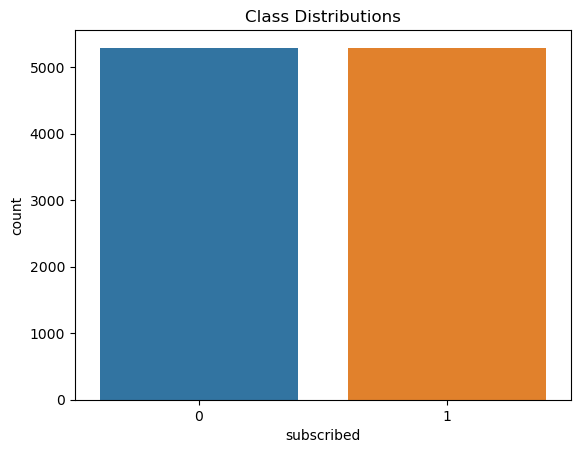

In [67]:
#Verify equal classes
# colors = []

plt.ticklabel_format(style = 'plain')
sns.countplot(x = 'subscribed', data = bank_final)#, palette = colors)
plt.title('Class Distributions') #font_size = 14)

plt.show

In [71]:
#Define independent and dependent variables
X = bank[['age', 'balance', 'married', 'education_unknown', 'education_tertiary', 'education_secondary', 'education_primary', 'credit_default', 'home_loan', 'cellphone']]
y = bank['subscribed']

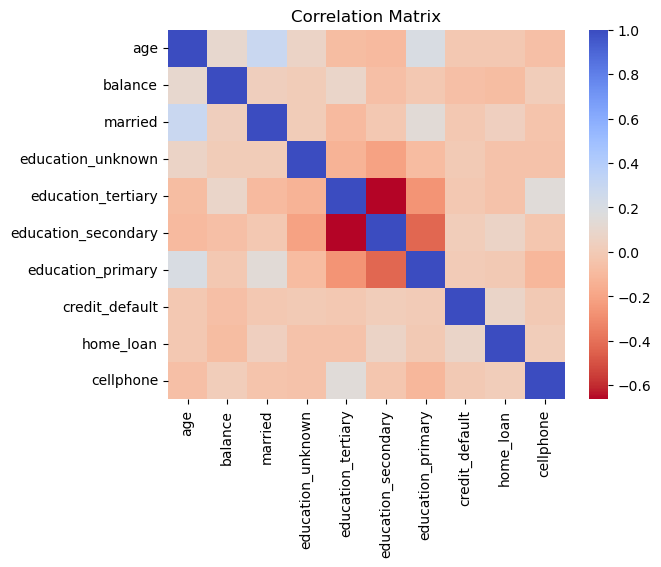

In [76]:
#Check for correlation between the variables
f, (ax1) = plt.subplots(1,1)#, figsize(15,5))

prospects_corr = X.corr()

sns.heatmap(prospects_corr, cmap = 'coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Correlation Matrix")#, font_size = 14)

plt.show()

In [77]:
#Separate into train, test, split for models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [78]:
#Instantiate Logistic Regression model
model_logreg = LogisticRegression()

#Fit model with training data
model_logreg.fit(X_train, y_train)

#Predict probabilities
y_pred_prob = model_logreg.predict(X_test)

In [79]:
#Cross validation
cv_scores = cross_val_score(model_logreg, X_train, y_train, cv=10)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

/Users/chelseavalencia/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross-validation scores: [0.88388167 0.88415814 0.88388167 0.88388167 0.88388167 0.88388167
 0.8836052  0.8836052  0.88384956 0.88412611]
Mean cross-validation score: 0.8838752550639679


/Users/chelseavalencia/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
#Classification report
print(classification_report(y_test, y_pred_prob))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7952
           1       0.00      0.00      0.00      1091

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.77      0.88      0.82      9043



In [83]:
#Coefficients and Odds Ratio
coefficients = model_logreg.coef_[0]
odds_ratio = np.exp(coefficients)

#Display feature importance using coefficients and odds ratio
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratio
})

print("\nFeature Importance (Coefficient and Odds Ratio):")
print(feature_importance.sort_values(by='Coefficient', ascending = False))


Feature Importance (Coefficient and Odds Ratio):
               Feature  Coefficient  Odds Ratio
9            cellphone     0.828920    2.290844
0                  age     0.006897    1.006921
1              balance     0.000030    1.000030
3    education_unknown    -0.020572    0.979639
7       credit_default    -0.153861    0.857391
6    education_primary    -0.500380    0.606300
4   education_tertiary    -0.603765    0.546749
5  education_secondary    -0.699518    0.496825
2              married    -0.704826    0.494194
8            home_loan    -0.934638    0.392728


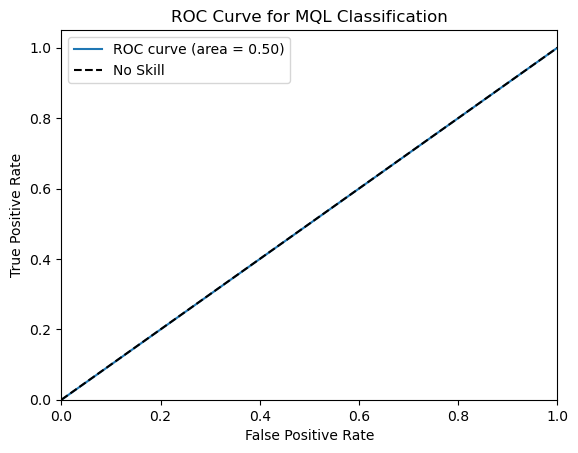

In [84]:
#Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

#Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], 'k--', label = 'No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MQL Classification')
plt.legend()
plt.show()

In [86]:
#Decision tree comparison

#Creating classifier object
decision_tree_model = DecisionTreeClassifier(criterion="gini", random_state = 100, max_depth=3, min_samples_leaf=5)

#Train model
decision_tree_model.fit(X_train, y_train)

#Predict response
y_pred = decision_tree_model.predict(X_test)

#Placeholder function for cal_accuracy
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, y_pred))

#Cross validation
cv_scores_dt = cross_val_score(decision_tree_model, X_train, y_train, cv=10)

print("Cross-validation scores:", cv_scores_dt)
print("Mean cross-validation score:", cv_scores_dt.mean())

[[7952    0]
 [1090    1]]
87.94647793873715
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7952
           1       1.00      0.00      0.00      1091

    accuracy                           0.88      9043
   macro avg       0.94      0.50      0.47      9043
weighted avg       0.89      0.88      0.82      9043

Cross-validation scores: [0.88222284 0.88388167 0.88388167 0.88388167 0.88388167 0.8836052
 0.88388167 0.88388167 0.88301991 0.88412611]
Mean cross-validation score: 0.8836264071334725


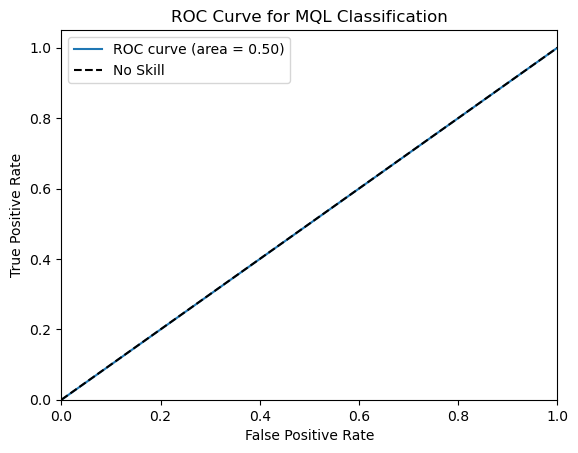

In [87]:
#Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

#Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], 'k--', label = 'No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MQL Classification')
plt.legend()
plt.show()

In [88]:
#Random Forest Classifier

#Instantiate Model
model_random_forest = RandomForestClassifier(n_estimators = 100)

#Performing training
model_random_forest.fit(X_train, y_train)

#Predict response
y_pred_rf = model_random_forest.predict(X_test)

#Calculate accuracy
print(confusion_matrix(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred_rf)*100)
print(classification_report(y_test, y_pred_rf))

[[7497  455]
 [ 836  255]]
85.7237642375318
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7952
           1       0.36      0.23      0.28      1091

    accuracy                           0.86      9043
   macro avg       0.63      0.59      0.60      9043
weighted avg       0.83      0.86      0.84      9043



In [89]:
#Determine feature importance
feature_names = X.columns
importances = model_random_forest.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
print(feature_imp_df)

               Feature  Gini Importance
1              balance         0.708415
0                  age         0.236890
9            cellphone         0.021558
2              married         0.009237
8            home_loan         0.008046
4   education_tertiary         0.004276
5  education_secondary         0.003422
6    education_primary         0.003408
3    education_unknown         0.002472
7       credit_default         0.002275


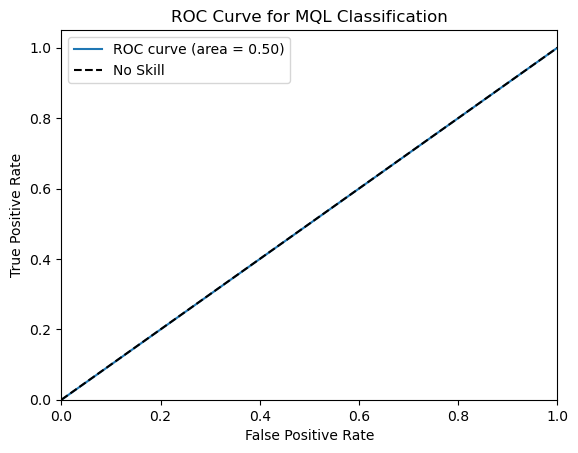

In [90]:
#Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

#Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], 'k--', label = 'No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MQL Classification')
plt.legend()
plt.show()

In [ ]:
#XGBoost Classifier
model_xg = xgb.XGBClassifier(objective='multi:softmax', num_class=3)

#Perform training
model_xg.fit(X_train, y_train)

#Predict reponse
y_pred_xg = random_forest_model.predict(X_test)

#Calculate accuracy
print(confusion_matrix(y_test, y_pred_xg))
print(accuracy_score(y_test, y_pred_xg)*100)
print(classification_report(y_test, y_pred_xg))

In [ ]:
#Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

#Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], 'k--', label = 'No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MQL Classification')
plt.legend()
plt.show()

In [91]:
#Isolation Forest for analmoly detection
clf = IsolationForest(contamination=0.1)

clf.fit(X_train)

y_pred_if = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred_if))
print(accuracy_score(y_test, y_pred_if)*100)
print(classification_report(y_test, y_pred_if))

/Users/chelseavalencia/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


[[   0    0    0]
 [ 716    0 7236]
 [ 122    0  969]]
10.715470529691475
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00      7952
           1       0.12      0.89      0.21      1091

    accuracy                           0.11      9043
   macro avg       0.04      0.30      0.07      9043
weighted avg       0.01      0.11      0.03      9043



/Users/chelseavalencia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chelseavalencia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chelseavalencia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users